# Лабораторна робота №2 (бригада № 6)

Коефіцієнти: 

$a_0 = 0; a_1 = -0.045; a_2 = -0.079; a_3 = 0.525$


$b_1 = 0.3; b_2 = 0.4; b_3 = 0.3$

## Генерація часового ряду

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import pacf

from time_series_generation import TimeSeries
from moving_average import moving_average
from PACF import PACF

In [2]:
np.random.seed(36)
a_coef = np.array([0, -0.045, -0.079, 0.525])
b_coef = np.array([1, 0.3, 0.4, 0.3])

In [3]:
time_series_object = TimeSeries(a_coef, b_coef)
time_series_object.time_series_generate()

In [4]:
time_series_object.time_series[:5]

array([[ 0.67641327],
       [ 1.52109919],
       [-0.51187625],
       [ 2.06597998],
       [ 0.75196704]])

In [5]:
time_series_object.ma_part[:5]

array([[ 0.67641327],
       [ 1.52109919],
       [-0.51187625],
       [ 1.15019464],
       [-0.59071681]])

In [6]:
#time_series_object.save_time_series("time_series.txt")
#time_series_object.save_ma_part("ma_part.txt")

In [7]:
%matplotlib inline

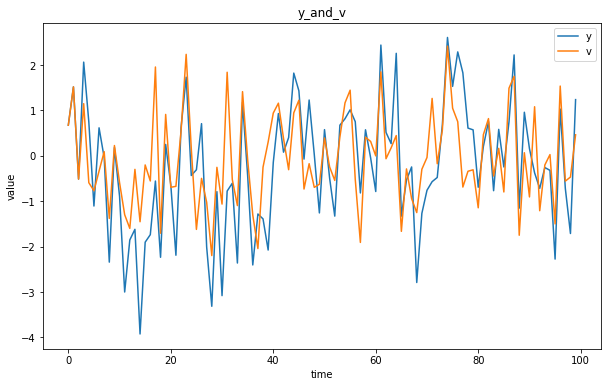

In [8]:
plt.figure(figsize = (10,6))
plt.plot(time_series_object.time_series, label='y')
plt.plot(time_series_object.ma_part, label='v')
plt.xlabel('time')
plt.ylabel('value')
plt.legend()
plt.title('y_and_v')
plt.savefig("figures/y_and_v.png", dpi=300)
plt.show();

## Ряди простого та експоненційного ковзних середніх

In [9]:
RSTin = np.loadtxt('Data/RTSin.txt', dtype = 'float')
rts2001 = np.loadtxt('Data/2001rts1.txt', dtype = 'float')

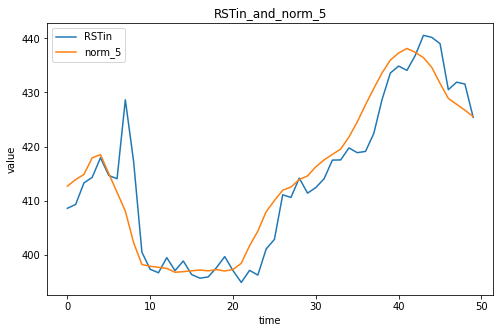

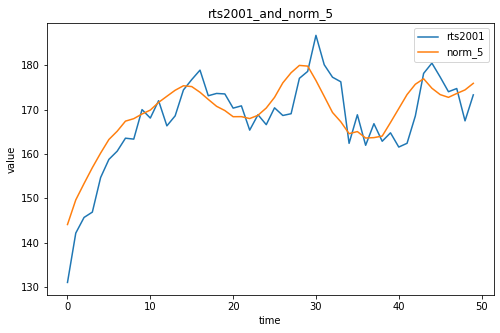

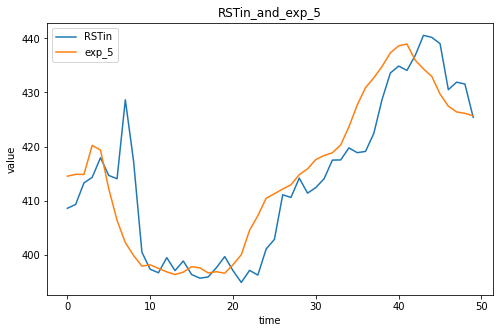

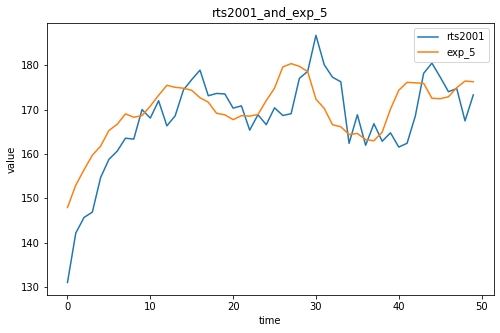

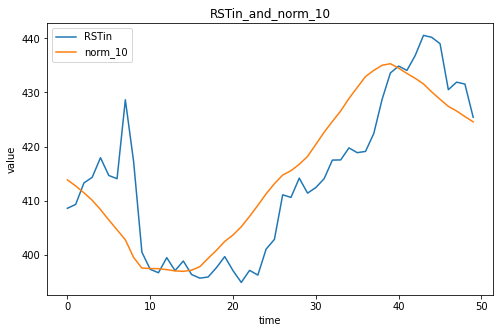

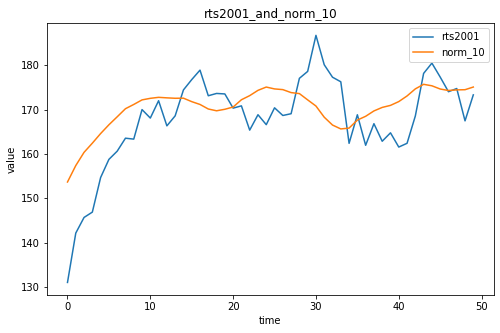

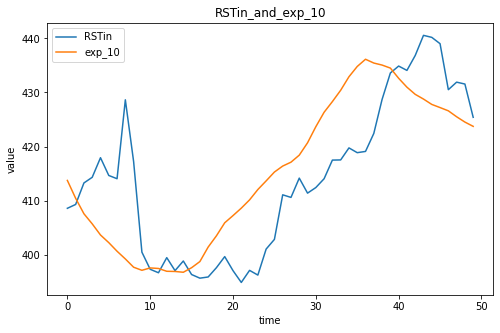

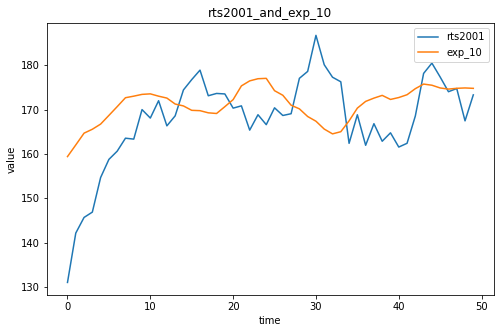

In [10]:
with open("weights.txt", "w") as f:
    for i in [5,10]:
        for j in ['norm', 'exp']:
            ma_RSTin , w_R = moving_average(RSTin, n=i, weights_name=j)
            plt.figure(figsize = (8,5))
            plt.plot(RSTin[:50], label='RSTin')
            plt.plot(ma_RSTin[:50], label=f'{j}_{i}')
            plt.xlabel('time')
            plt.ylabel('value')
            plt.legend()
            plt.title(f'RSTin_and_{j}_{i}')
            plt.savefig(f"figures/RSTin_ma_{j}_{i}.png", dpi=300)
            plt.show();
            
            ma_rts2001 , w_2001 = moving_average(rts2001, n=i, weights_name=j)
            plt.figure(figsize = (8,5))
            plt.plot(rts2001[:50], label='rts2001')
            plt.plot(ma_rts2001[:50], label=f'{j}_{i}')
            plt.xlabel('time')
            plt.ylabel('value')
            plt.legend()
            plt.title(f'rts2001_and_{j}_{i}')
            plt.savefig(f"figures/rts2001_ma_{j}_{i}.png", dpi=300)
            plt.show();
            
            f.write(f'\nRSTin_ma_{j}_{i}: \n')
            f.write(str(w_R) + '\n')
            f.write(f'\nrts2001_ma_{j}_{i}\n')
            f.write(str(w_2001) + "\n")
        

## ЧАКФ

**RSTin**

In [11]:
pacf_ = PACF(RSTin)
pacf_RSTin = [pacf_.find_F(i) for i in range(13)]
np.array(pacf_RSTin)

array([ 1.        ,  0.97679586, -0.06211881, -0.01865688, -0.02231599,
        0.00742591, -0.03140949, -0.04301457, -0.01891939,  0.04222262,
        0.0116365 , -0.03204576, -0.00849668])

In [12]:
pacf(RSTin, nlags=12, method = 'ldb')              #check

array([ 1.        ,  0.97679586, -0.06211881, -0.01865688, -0.02231599,
        0.00742591, -0.03140949, -0.04301457, -0.01891939,  0.04222262,
        0.0116365 , -0.03204576, -0.00849668])

**rts2001**

In [13]:
pacf_ = PACF(rts2001)
pacf_rts2001 = [pacf_.find_F(i) for i in range(13)]                       
pacf_rts2001

[1.0000000000000007,
 0.9552051114598963,
 0.05123250783615003,
 -0.015487441832032708,
 0.002960774377889752,
 0.05923043476194194,
 0.0008032405740245375,
 0.03917991376932051,
 -0.023798418005613112,
 -0.003032903118381911,
 0.014479121654041688,
 -0.033176051841849484,
 0.07751717001810425]

In [14]:
list(pacf(rts2001, nlags=12, method = 'ldb'))                      #check

[1.0,
 0.9552051114598962,
 0.05123250783614542,
 -0.01548744183202375,
 0.002960774377887459,
 0.05923043476193705,
 0.0008032405740263126,
 0.03917991376932752,
 -0.023798418005619396,
 -0.0030329031183804083,
 0.014479121654042975,
 -0.03317605184185102,
 0.07751717001810302]

**time_series**

In [15]:
pacf_ = PACF(time_series_object.time_series)
pacf_RSTin = [pacf_.find_F(i) for i in range(13)]
np.array(pacf_RSTin)[:,0]

array([ 1.        ,  0.30543388,  0.19210834,  0.4469482 , -0.36335974,
       -0.19557688, -0.07505844,  0.27228557,  0.00119522, -0.01596949,
        0.02907139, -0.05031514,  0.03499945])

In [16]:
pacf(time_series_object.time_series, nlags=12, method = 'ldb')                    #check

array([ 1.        ,  0.30543388,  0.19210834,  0.4469482 , -0.36335974,
       -0.19557688, -0.07505844,  0.27228557,  0.00119522, -0.01596949,
        0.02907139, -0.05031514,  0.03499945])

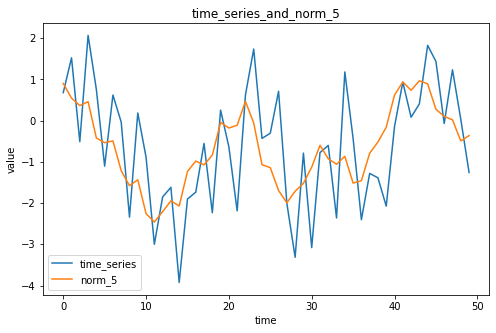

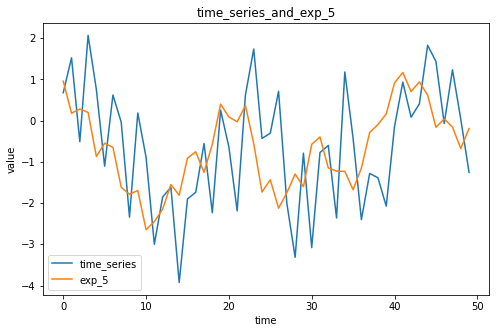

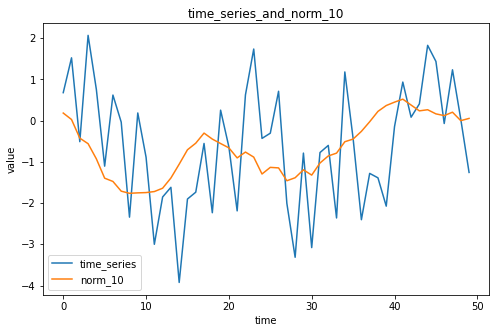

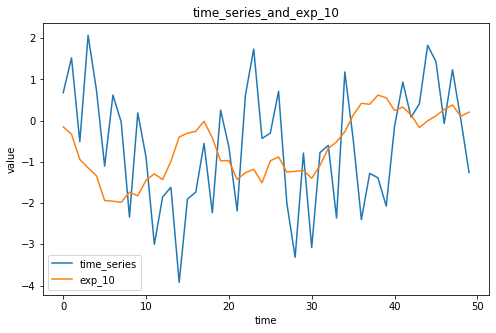

In [17]:
for i in [5,10]:
    for j in ['norm', 'exp']:
        ma_time , w = moving_average(time_series_object.time_series[:,0], n=i, weights_name=j)
        plt.figure(figsize = (8,5))
        plt.plot(time_series_object.time_series[:50,0], label='time_series')
        plt.plot(ma_time[:50], label=f'{j}_{i}')
        plt.xlabel('time')
        plt.ylabel('value')
        plt.legend()
        plt.title(f'time_series_and_{j}_{i}')
        plt.show();